## **ENIGH** - Data Transformation y PCA
* 18 de Marzo del 2025
#### ESCOM - IPN: *Modelado Predictivo*
#### Prof. Claudia Blanquel

#### *Lic. Ciencia de Datos* - 6AM1

> Armas Ramirez Daniel

> Gutierrez Ramirez Alana Sofia

> Hernández Peña Irving Jafet

> Reyes Maldonado Oscar Romario

> Sanchez Garcia Miguel Alexander

#### **0° Introducción**

Datos obtenidos de:

> https://www.inegi.org.mx/programas/enigh/nc/2016/#datos_abiertos

**a.** Como primer paso, necesitamos **importar** todas las **librerias** que usaremos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

import scipy.stats as stats

from sklearn.preprocessing import PowerTransformer

# For PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances

**b.** Extraer la tabla necesaria de la base de datos

In [3]:
concentradohogar_df = pd.read_csv('datasets-ENIGH/conjunto_de_datos_concentradohogar_enigh_2016_ns/conjunto_de_datos/conjunto_de_datos_concentradohogar_enigh_2016_ns.csv')

#### **1° Data Cleaning**

In [4]:
concentradohogar_df.head()

,folioviv,foliohog,ubica_geo,ageb,tam_loc,est_socio,est_dis,upm,factor,clase_hog,...,mater_serv,material,servicio,deposito,prest_terc,pago_tarje,deudas,balance,otras_erog,smg
0,100003801,1,10010000,000-0,1,4,3,10,248,2,...,98.36,98.36,0.00,0.0,0.0,17409.83,0.0,0.0,0.0,6573.6
1,100003802,1,10010000,000-0,1,4,3,10,248,2,...,0.00,0.00,0.00,0.0,0.0,5360.65,0.0,0.0,0.0,6573.6
2,100003803,1,10010000,000-0,1,4,3,10,248,2,...,172.13,0.00,172.13,0.0,0.0,23606.55,0.0,0.0,0.0,6573.6
3,100003804,1,10010000,000-0,1,4,3,10,248,3,...,0.00,0.00,0.00,0.0,0.0,8852.45,0.0,0.0,0.0,6573.6
4,100003805,1,10010000,000-0,1,4,3,10,248,2,...,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,6573.6


**a.** Declarar las características necesarias

In [5]:
# Lista que contiene las columnas que se consideran categorías
categorias = ['folioviv', 'sexo_jefe', 'edad_jefe', 'educa_jefe', 'tot_integ', 'hombres', 'mujeres', 'p12_64', 
              'p65mas', 'ocupados', 'percep_ing', 'perc_ocupa']

# Lista que contiene las columnas de ingresos
ingresos = ['ing_cor', 'percep_tot']

# Lista que contiene las columnas de gastos
gastos = ['gasto_mon', 'erogac_tot']

# Eliminamos las columnas que no son de interés (no están en las listas anteriores)
for columna in concentradohogar_df.columns:
    if columna not in categorias and columna not in ingresos and columna not in gastos:
        concentradohogar_df.drop(columna, axis=1, inplace=True)

In [6]:
# Valores nulos por columna
print(concentradohogar_df.isnull().sum())

folioviv      0
sexo_jefe     0
edad_jefe     0
educa_jefe    0
tot_integ     0
hombres       0
mujeres       0
p12_64        0
p65mas        0
ocupados      0
percep_ing    0
perc_ocupa    0
ing_cor       0
gasto_mon     0
percep_tot    0
erogac_tot    0
dtype: int64


In [7]:
data = concentradohogar_df.copy()

# Juntar gastos
data['total_gasto'] = data['gasto_mon'] + data['erogac_tot']

data.drop(['gasto_mon', 'erogac_tot'], axis=1, inplace=True)

# Junta ingresos
data['total_ingreso'] = data['ing_cor'] + data['percep_tot']

data.drop(['ing_cor', 'percep_tot'], axis=1, inplace=True)

print(data.shape)

data.head()


(70311, 14)


,folioviv,sexo_jefe,edad_jefe,educa_jefe,tot_integ,hombres,mujeres,p12_64,p65mas,ocupados,percep_ing,perc_ocupa,total_gasto,total_ingreso
0,100003801,1,33,10,2,1,1,2,0,2,2,2,64108.15,100696.70
1,100003802,1,29,10,2,1,1,2,0,2,2,2,87788.40,147496.59
2,100003803,1,47,10,6,2,4,3,0,1,1,1,78571.19,94622.95
3,100003804,2,29,11,3,0,3,3,0,2,3,2,51304.82,58278.65
4,100003805,1,55,10,2,2,0,2,0,1,1,1,47589.29,57295.07


In [8]:
# Guardar el nuevo dataset como un archivo CSV
data.to_csv('data_enigh/ENIGH_2016_cleaned.csv', index=False)

In [9]:
def his_plot(data, n, m):
    fig, sub_plots = plt.subplots(n, m, figsize=(20, 20))
    i = 0
    j = 0
    for column in data.columns:
        sns.histplot(data[column], kde=True, ax=sub_plots[i, j], bins=30)
        sub_plots[i, j].set_title('Distribution of ' + column)
        j += 1
        if j == m:
            i += 1
            j = 0
    plt.show()


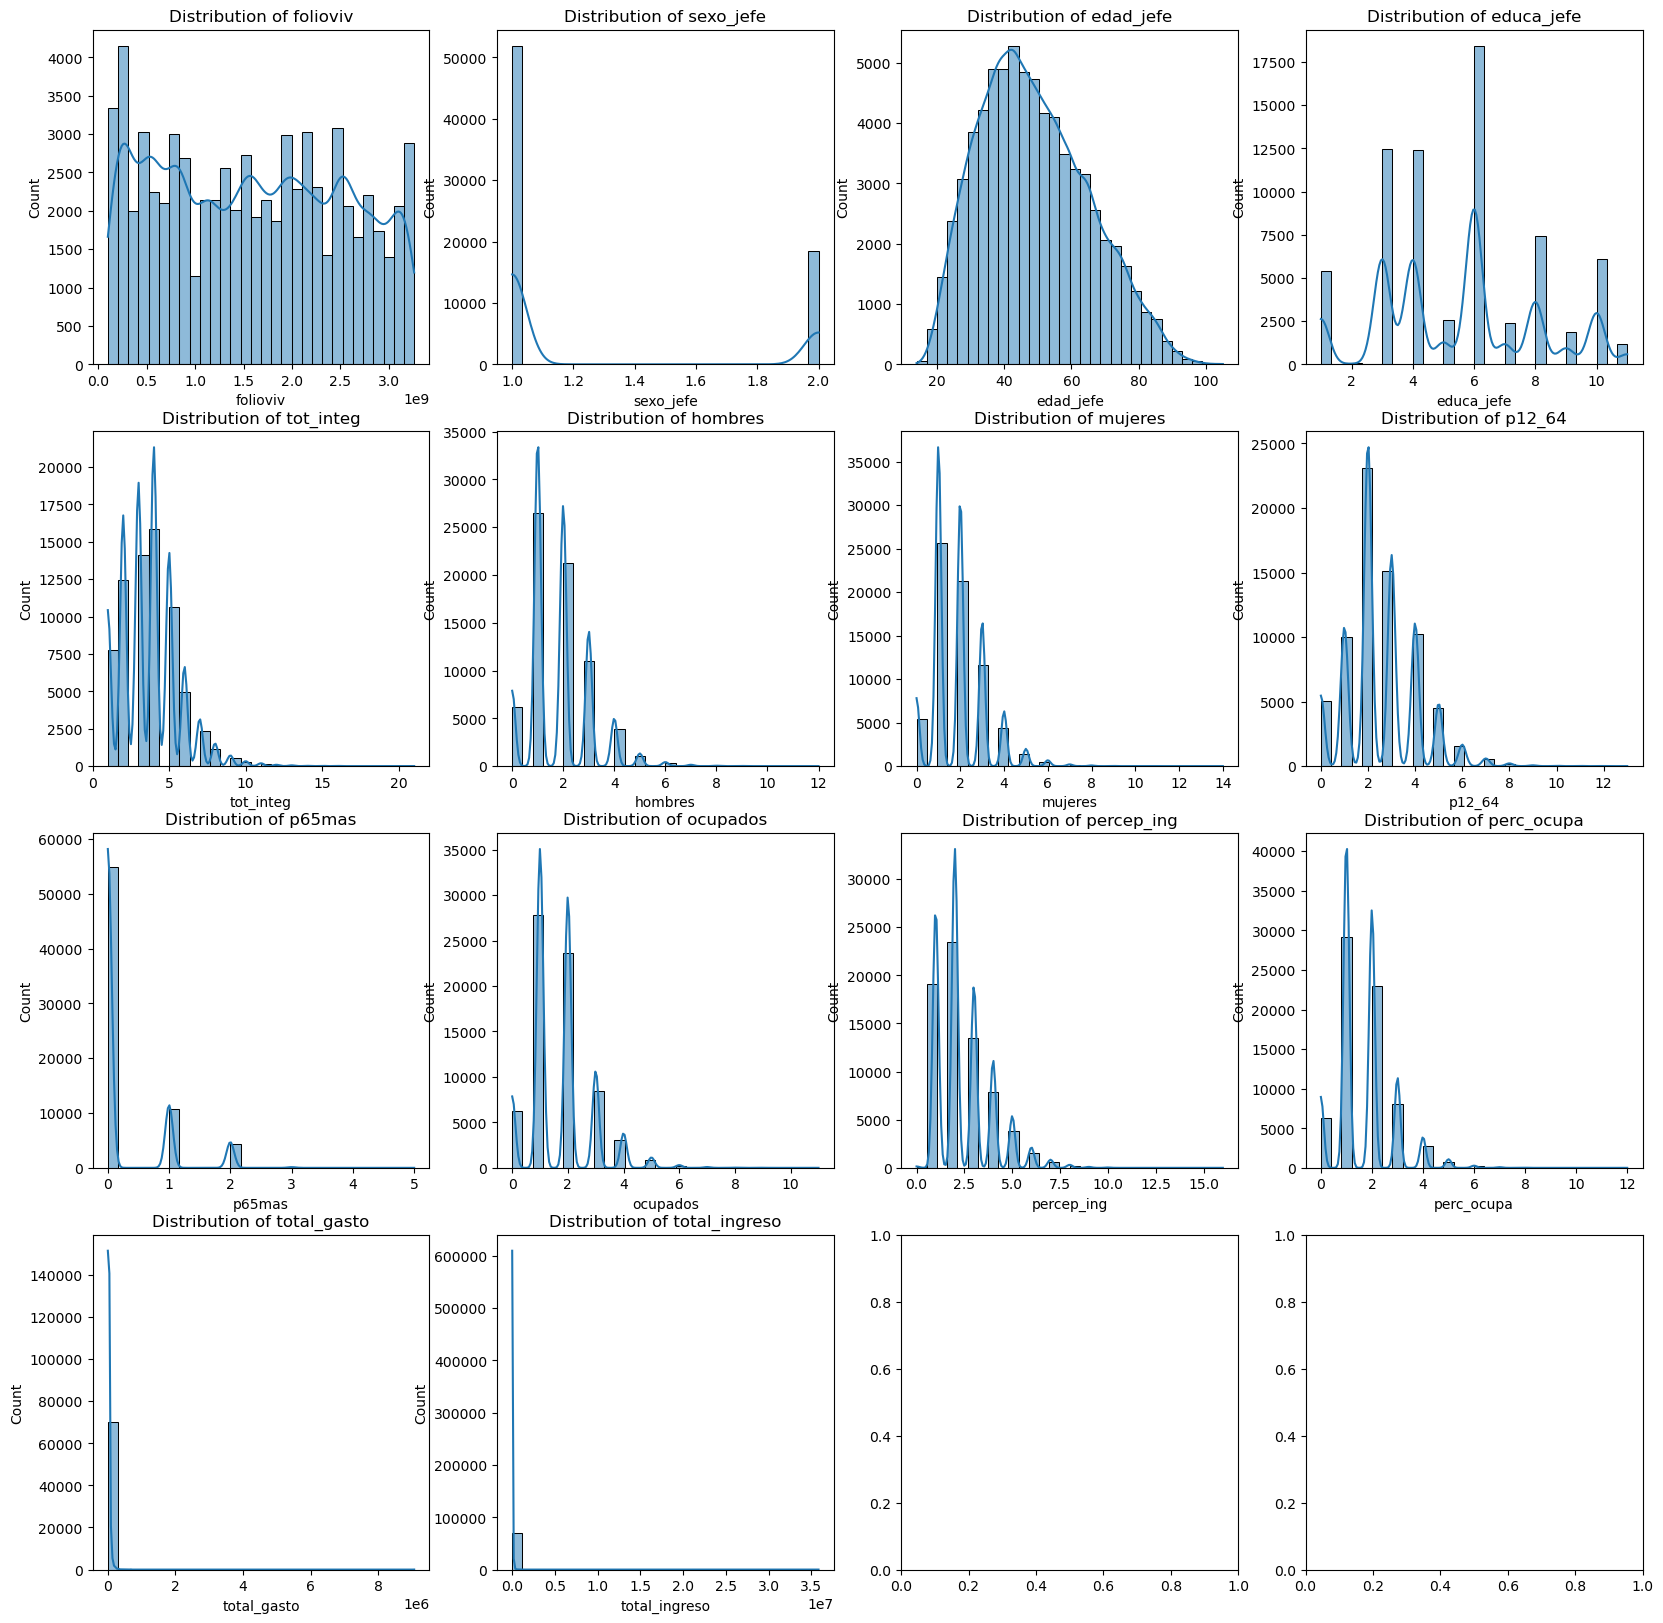

In [10]:
his_plot(data, 4, 4)

In [11]:
def q_q_plot(data, n, m):
    fig, sub_plots = plt.subplots(n, m, figsize=(20, 20))
    i = 0
    j = 0
    for column in data.columns:
        stats.probplot(data[column], dist="norm", plot=sub_plots[i, j])
        sub_plots[i, j].set_title('Q-Q Plot of ' + column)
        j += 1
        if j == m:
            i += 1
            j = 0
    plt.show()

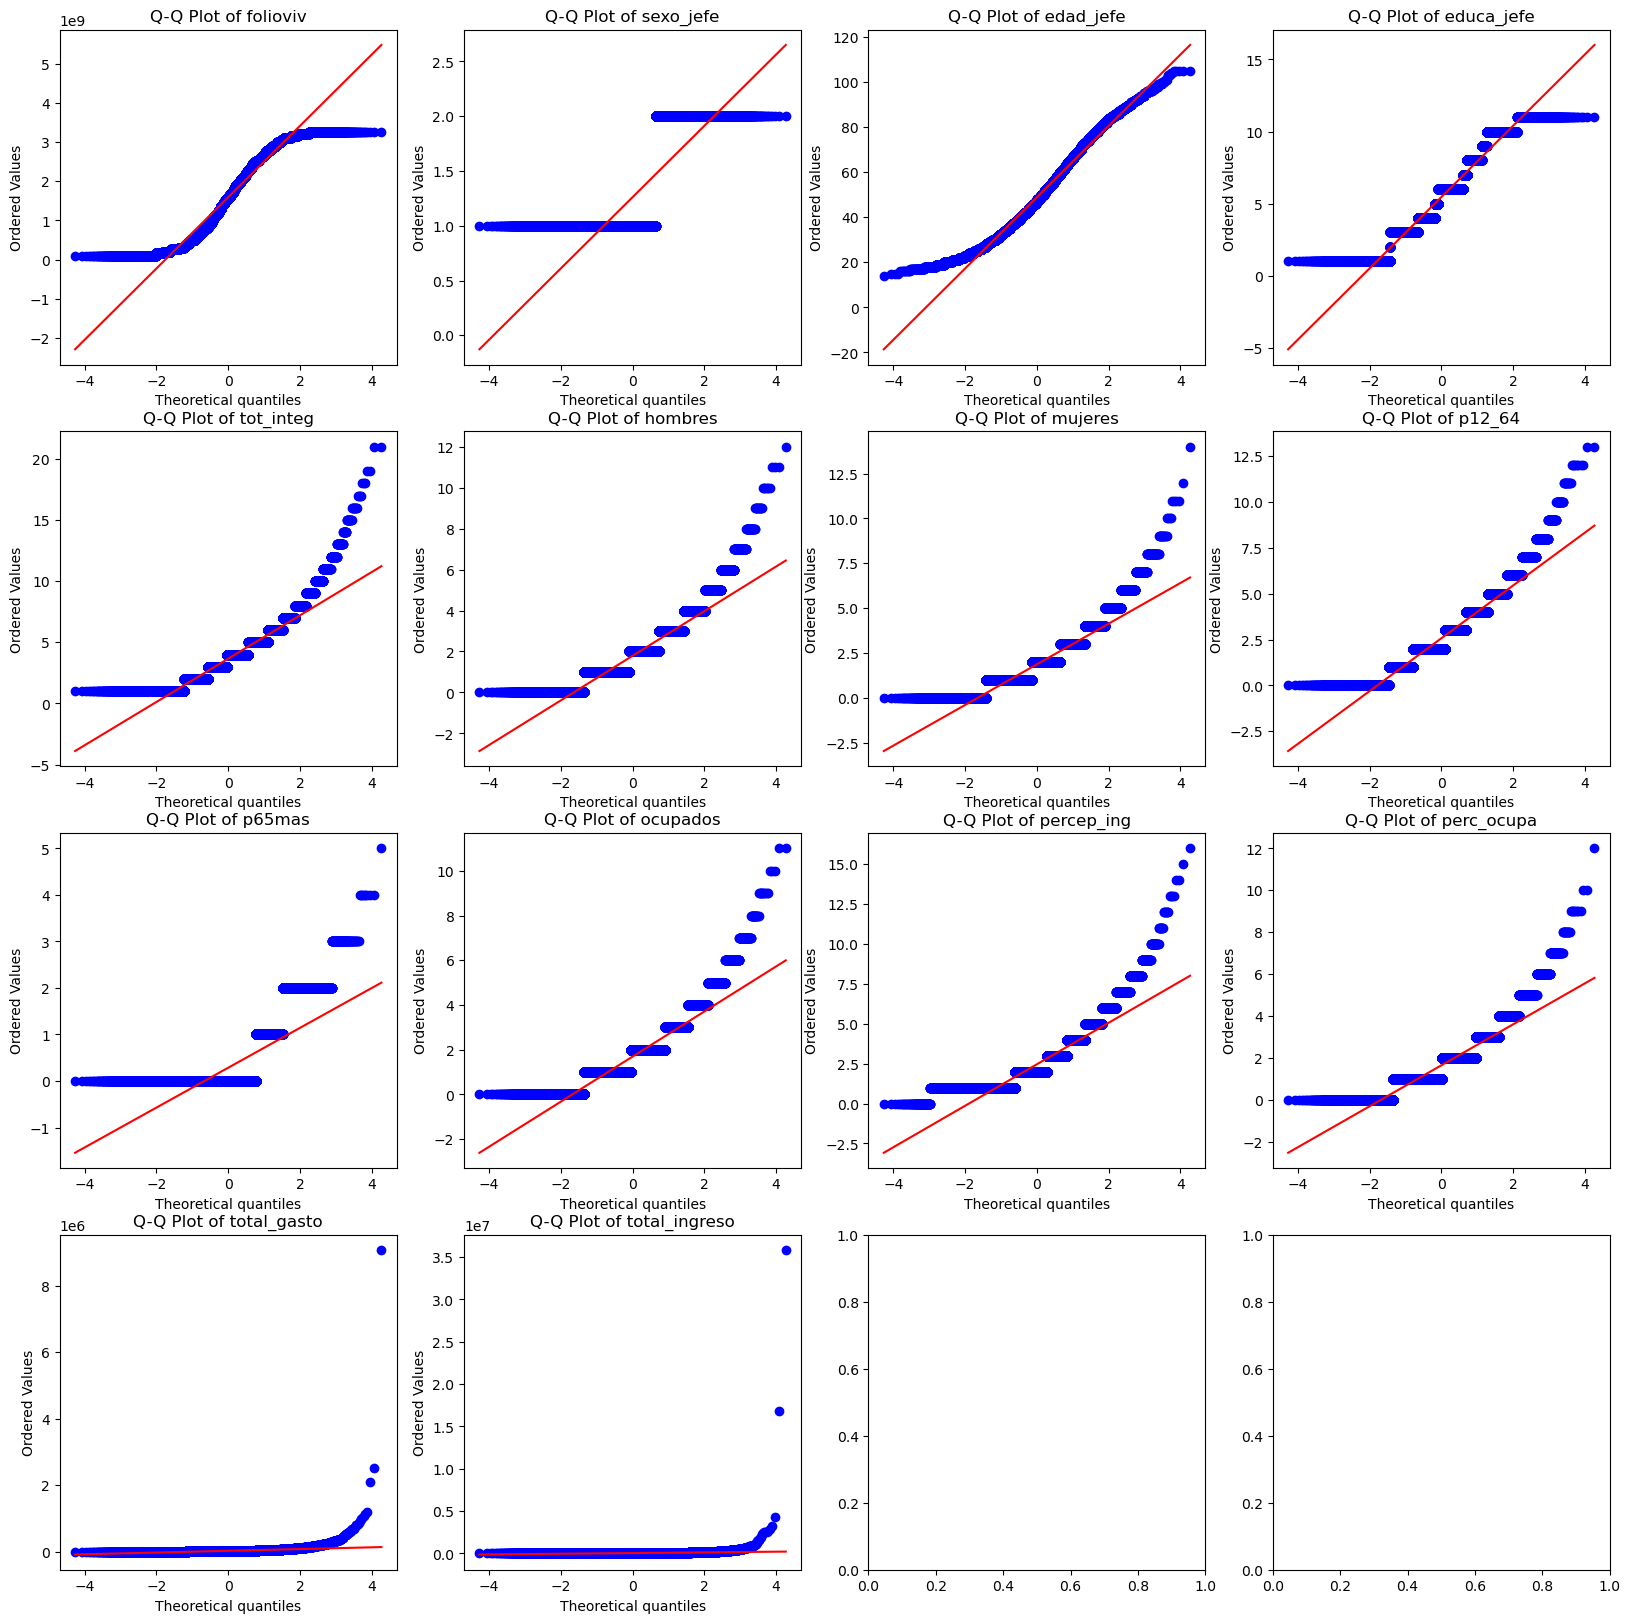

In [12]:
q_q_plot(data, 4, 4)

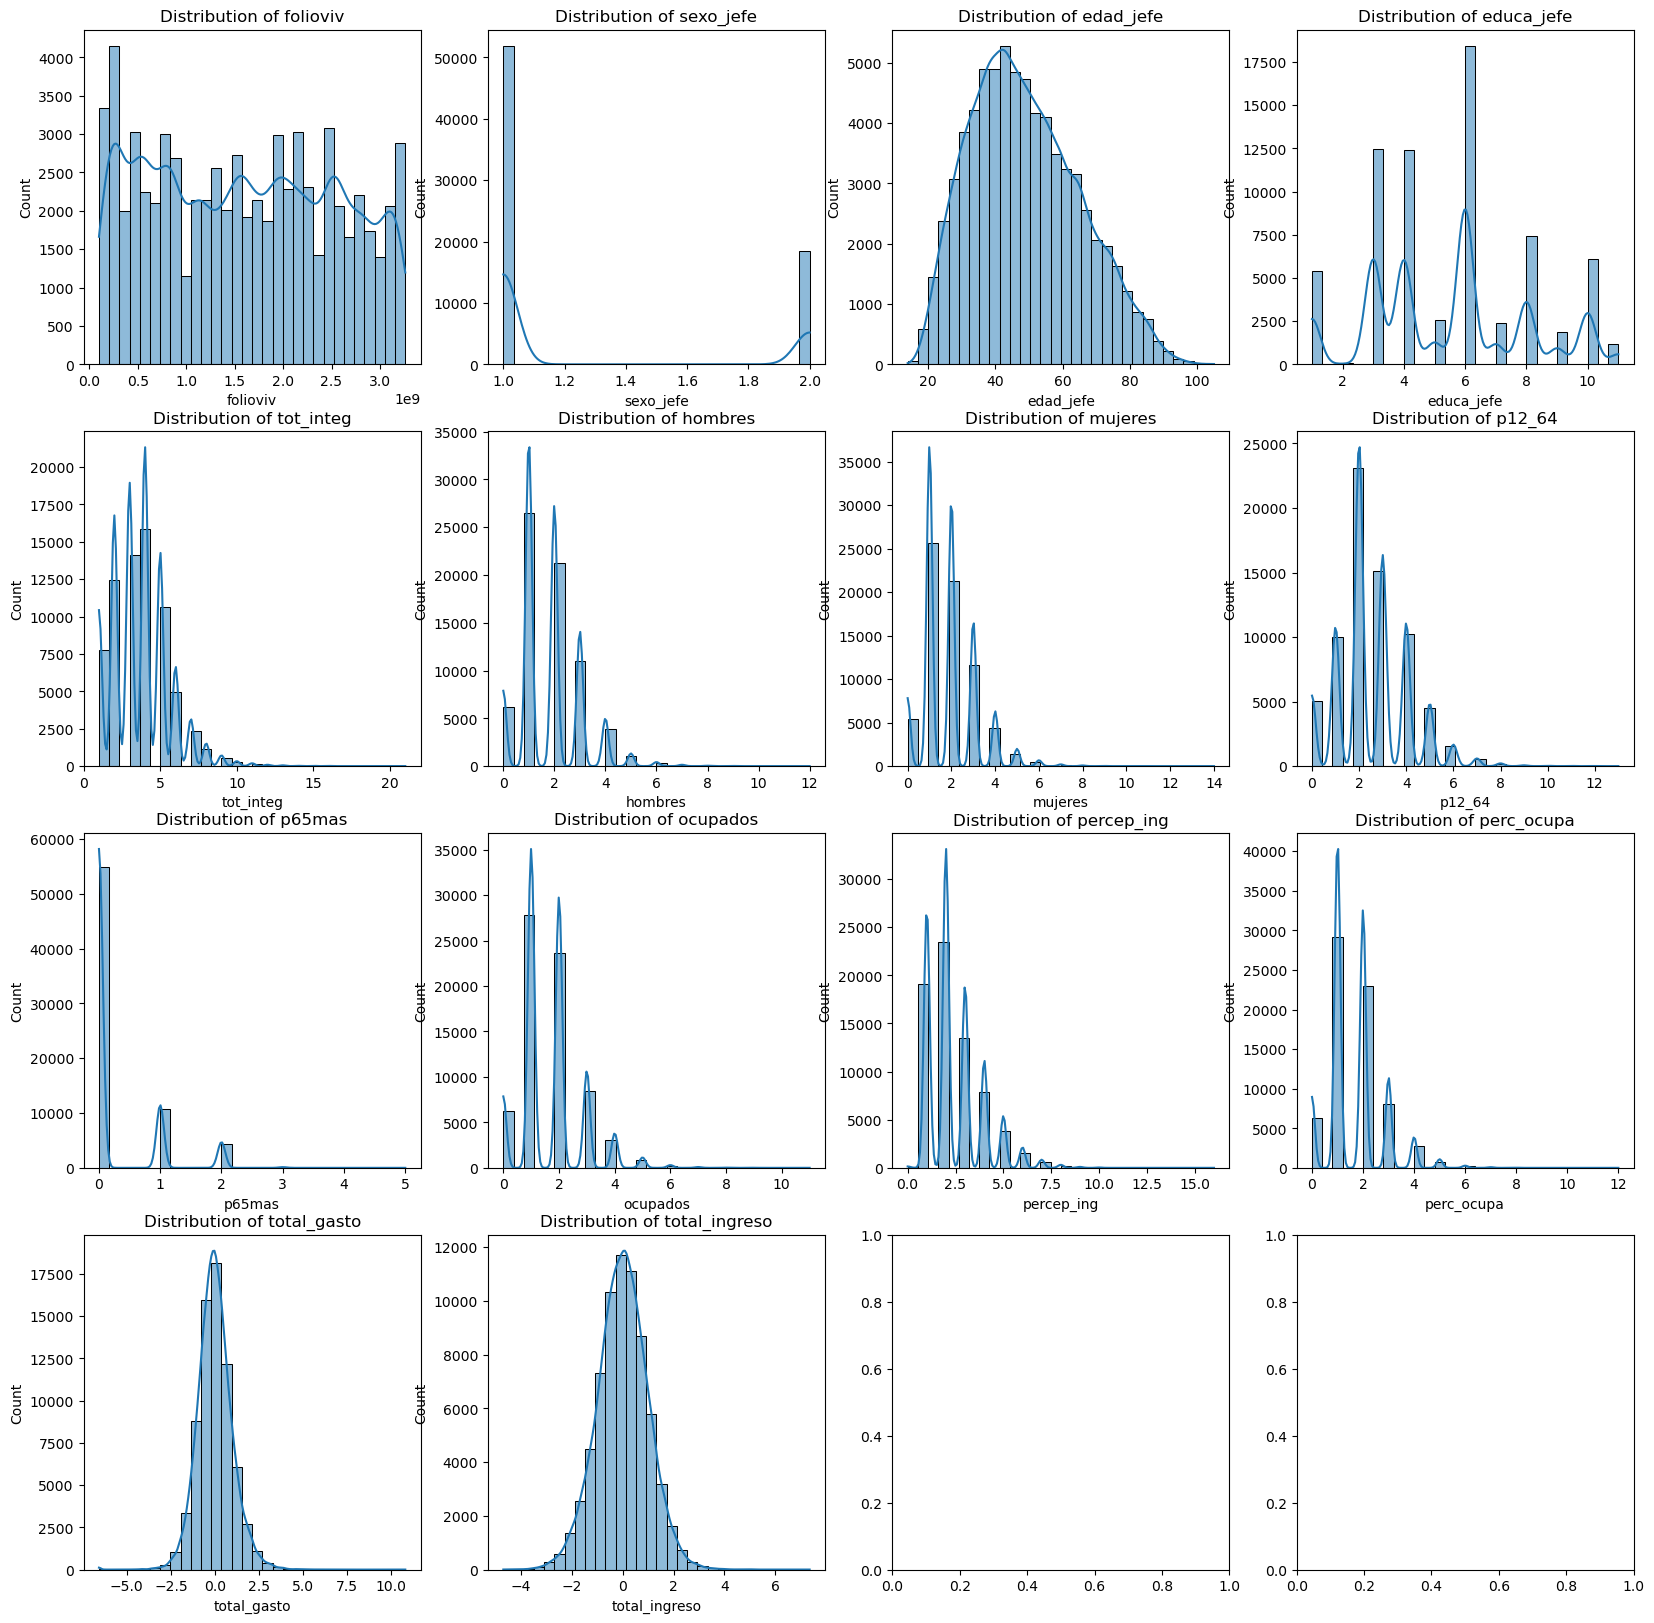

In [13]:
pt = PowerTransformer()

data['total_gasto'] = pt.fit_transform(data['total_gasto'].values.reshape(-1, 1))
data['total_ingreso'] = pt.fit_transform(data['total_ingreso'].values.reshape(-1, 1))

his_plot(data, 4, 4)

#### **2° EDA (Exploratory Data Analysis)**

##### *Datos generales*

**a.** Dimensiones del conjunto de datos

In [14]:
print('Rows: ' + str(data.shape[0]))
print('Columns: ' + str(data.shape[1]))

Rows: 70311
Columns: 14


**b.** Descripción del conjunto de datos

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70311 entries, 0 to 70310
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   folioviv       70311 non-null  int64  
 1   sexo_jefe      70311 non-null  int64  
 2   edad_jefe      70311 non-null  int64  
 3   educa_jefe     70311 non-null  int64  
 4   tot_integ      70311 non-null  int64  
 5   hombres        70311 non-null  int64  
 6   mujeres        70311 non-null  int64  
 7   p12_64         70311 non-null  int64  
 8   p65mas         70311 non-null  int64  
 9   ocupados       70311 non-null  int64  
 10  percep_ing     70311 non-null  int64  
 11  perc_ocupa     70311 non-null  int64  
 12  total_gasto    70311 non-null  float64
 13  total_ingreso  70311 non-null  float64
dtypes: float64(2), int64(12)
memory usage: 7.5 MB


**c.** Descrpcion de las columnas

In [16]:
numeric_columns = ['folioviv', 'edad_jefe', 'tot_integ', 'hombres', 'mujeres', 'ocupados', 'percep_ing', 'perc_ocupa', 'total_gasto', 'total_ingreso']

In [17]:
data[numeric_columns].describe()

,folioviv,edad_jefe,tot_integ,hombres,mujeres,ocupados,percep_ing,perc_ocupa,total_gasto,total_ingreso
count,7.031100e+04,70311.000000,70311.000000,70311.000000,70311.000000,70311.000000,70311.000000,70311.000000,7.031100e+04,7.031100e+04
mean,1.594219e+09,48.965965,3.664548,1.791171,1.873377,1.694500,2.466115,1.649031,-1.358208e-15,-3.460196e-16
std,9.323485e+08,15.988477,1.841030,1.157776,1.203629,1.078737,1.403639,1.048979,1.000007e+00,1.000007e+00
min,1.000038e+08,14.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.581060e+00,-4.692670e+00
25%,7.621785e+08,37.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-6.180693e-01,-6.371138e-01
50%,1.562090e+09,47.000000,4.000000,2.000000,2.000000,2.000000,2.000000,1.000000,-3.557731e-02,6.985568e-03
75%,2.402681e+09,60.000000,5.000000,2.000000,3.000000,2.000000,3.000000,2.000000,5.731585e-01,6.486431e-01
max,3.260802e+09,105.000000,21.000000,12.000000,14.000000,11.000000,16.000000,12.000000,1.080243e+01,7.353444e+00


##### *Analisis Visual*

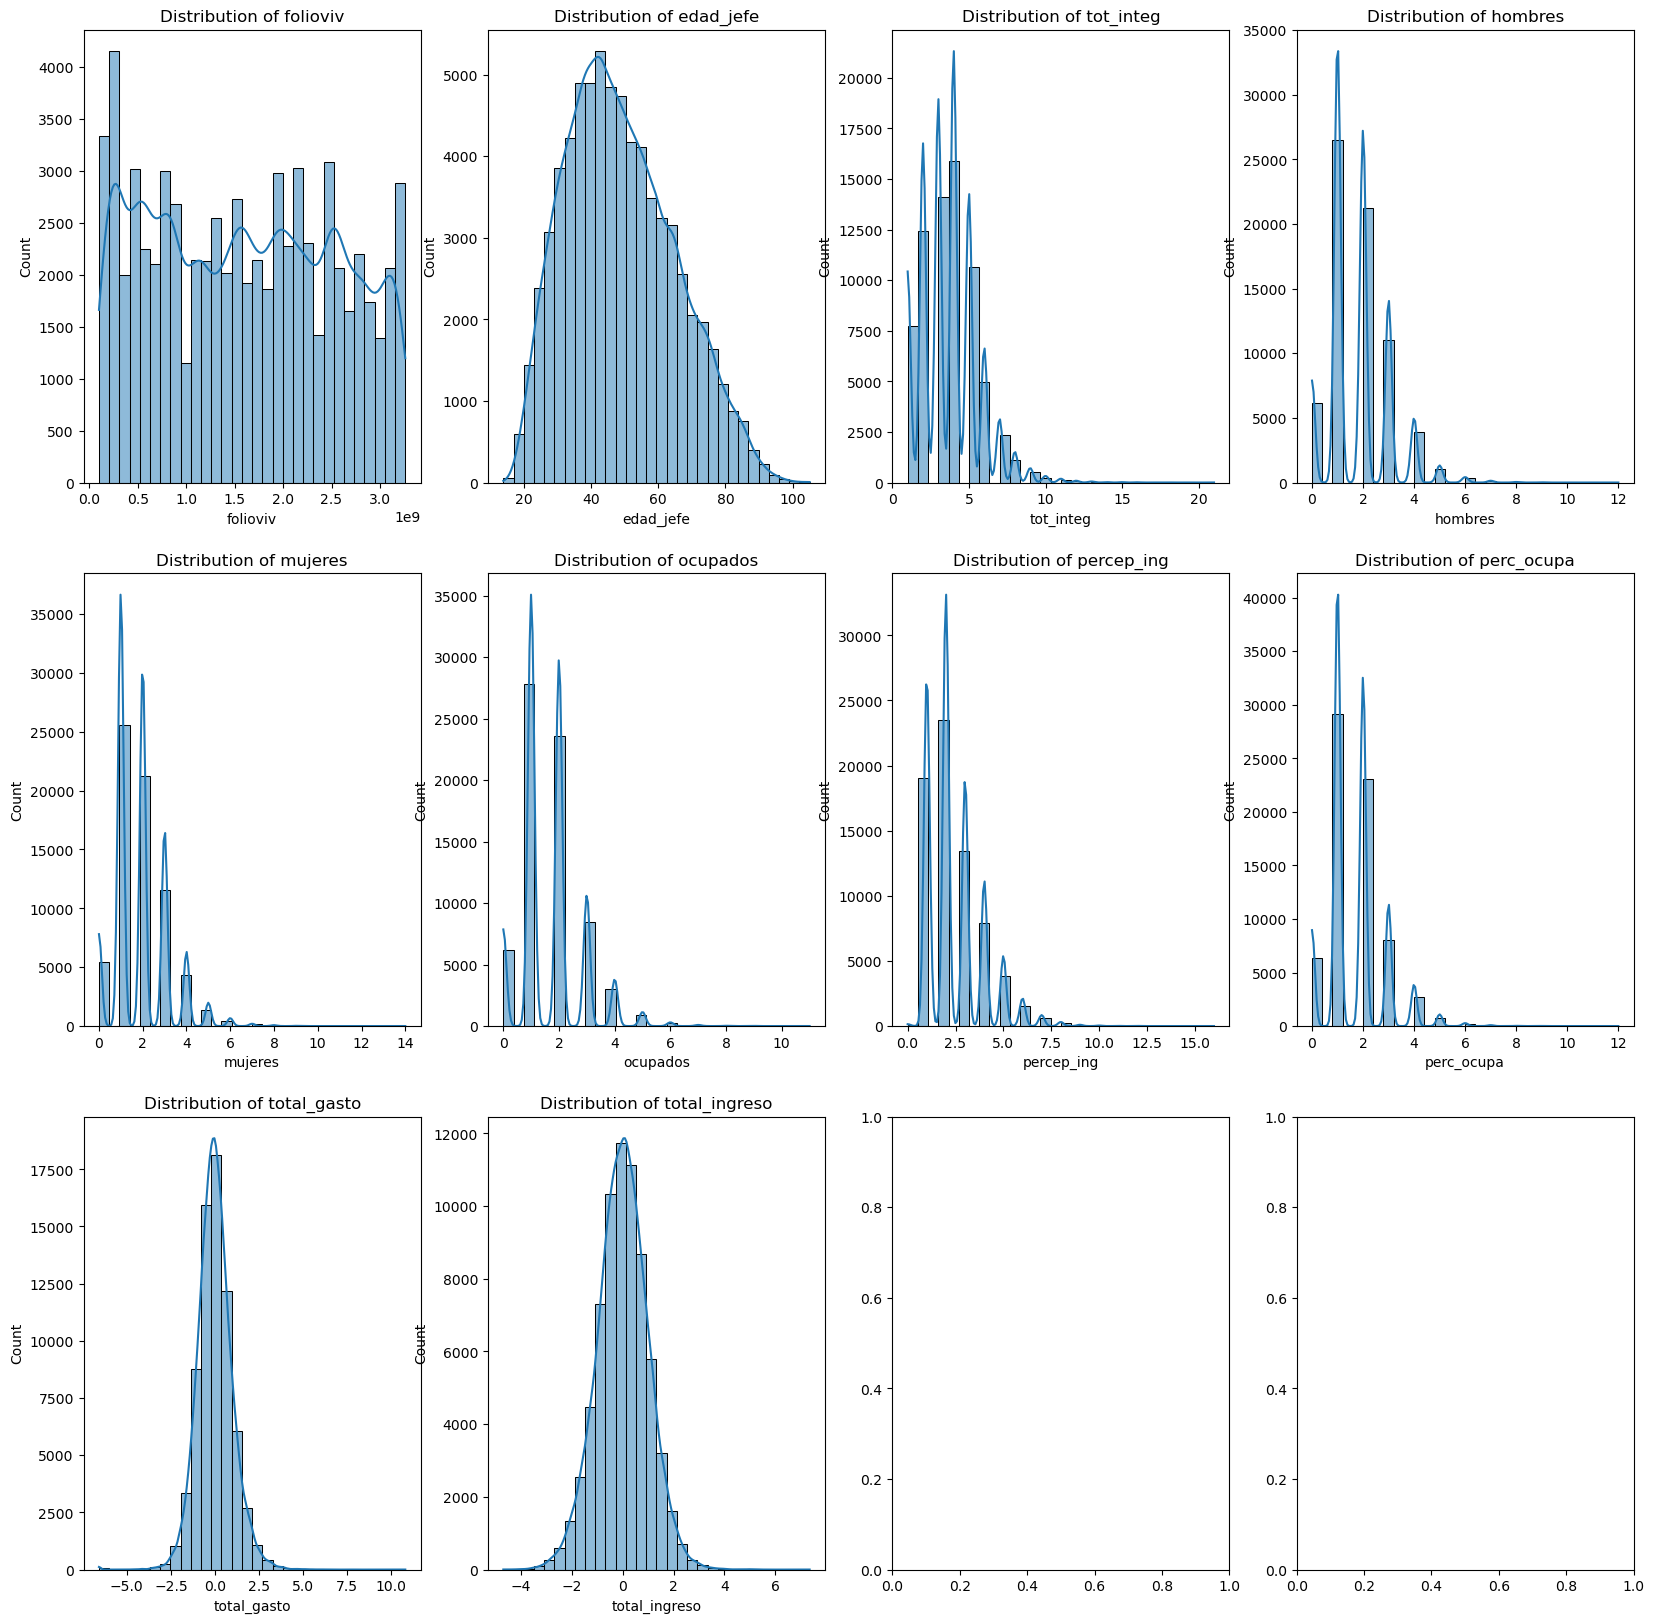

In [18]:
his_plot(data[numeric_columns], 3, 4)

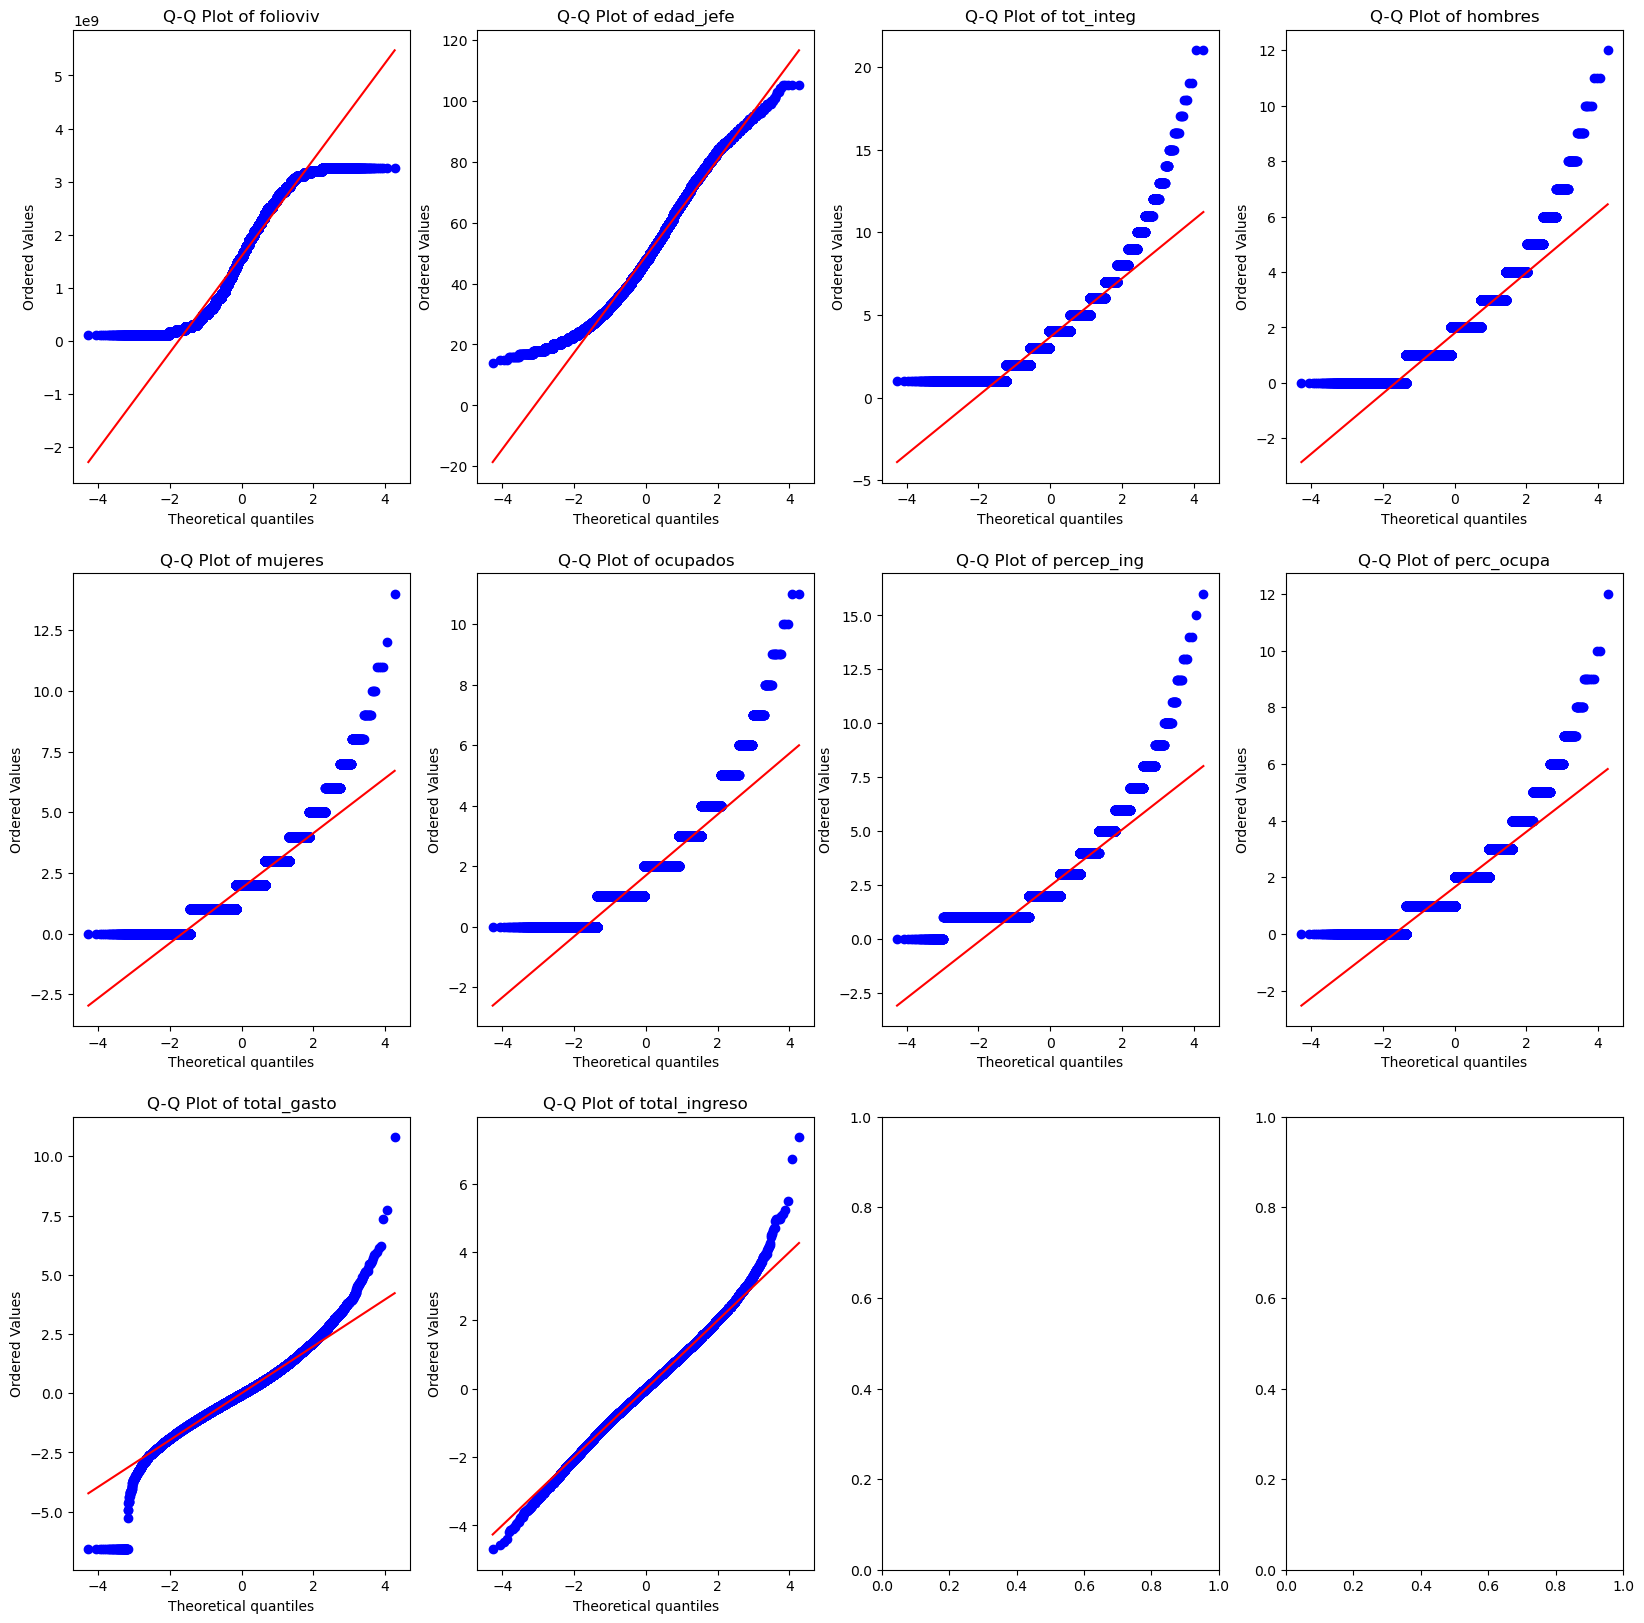

In [19]:
q_q_plot(data[numeric_columns], 3, 4)

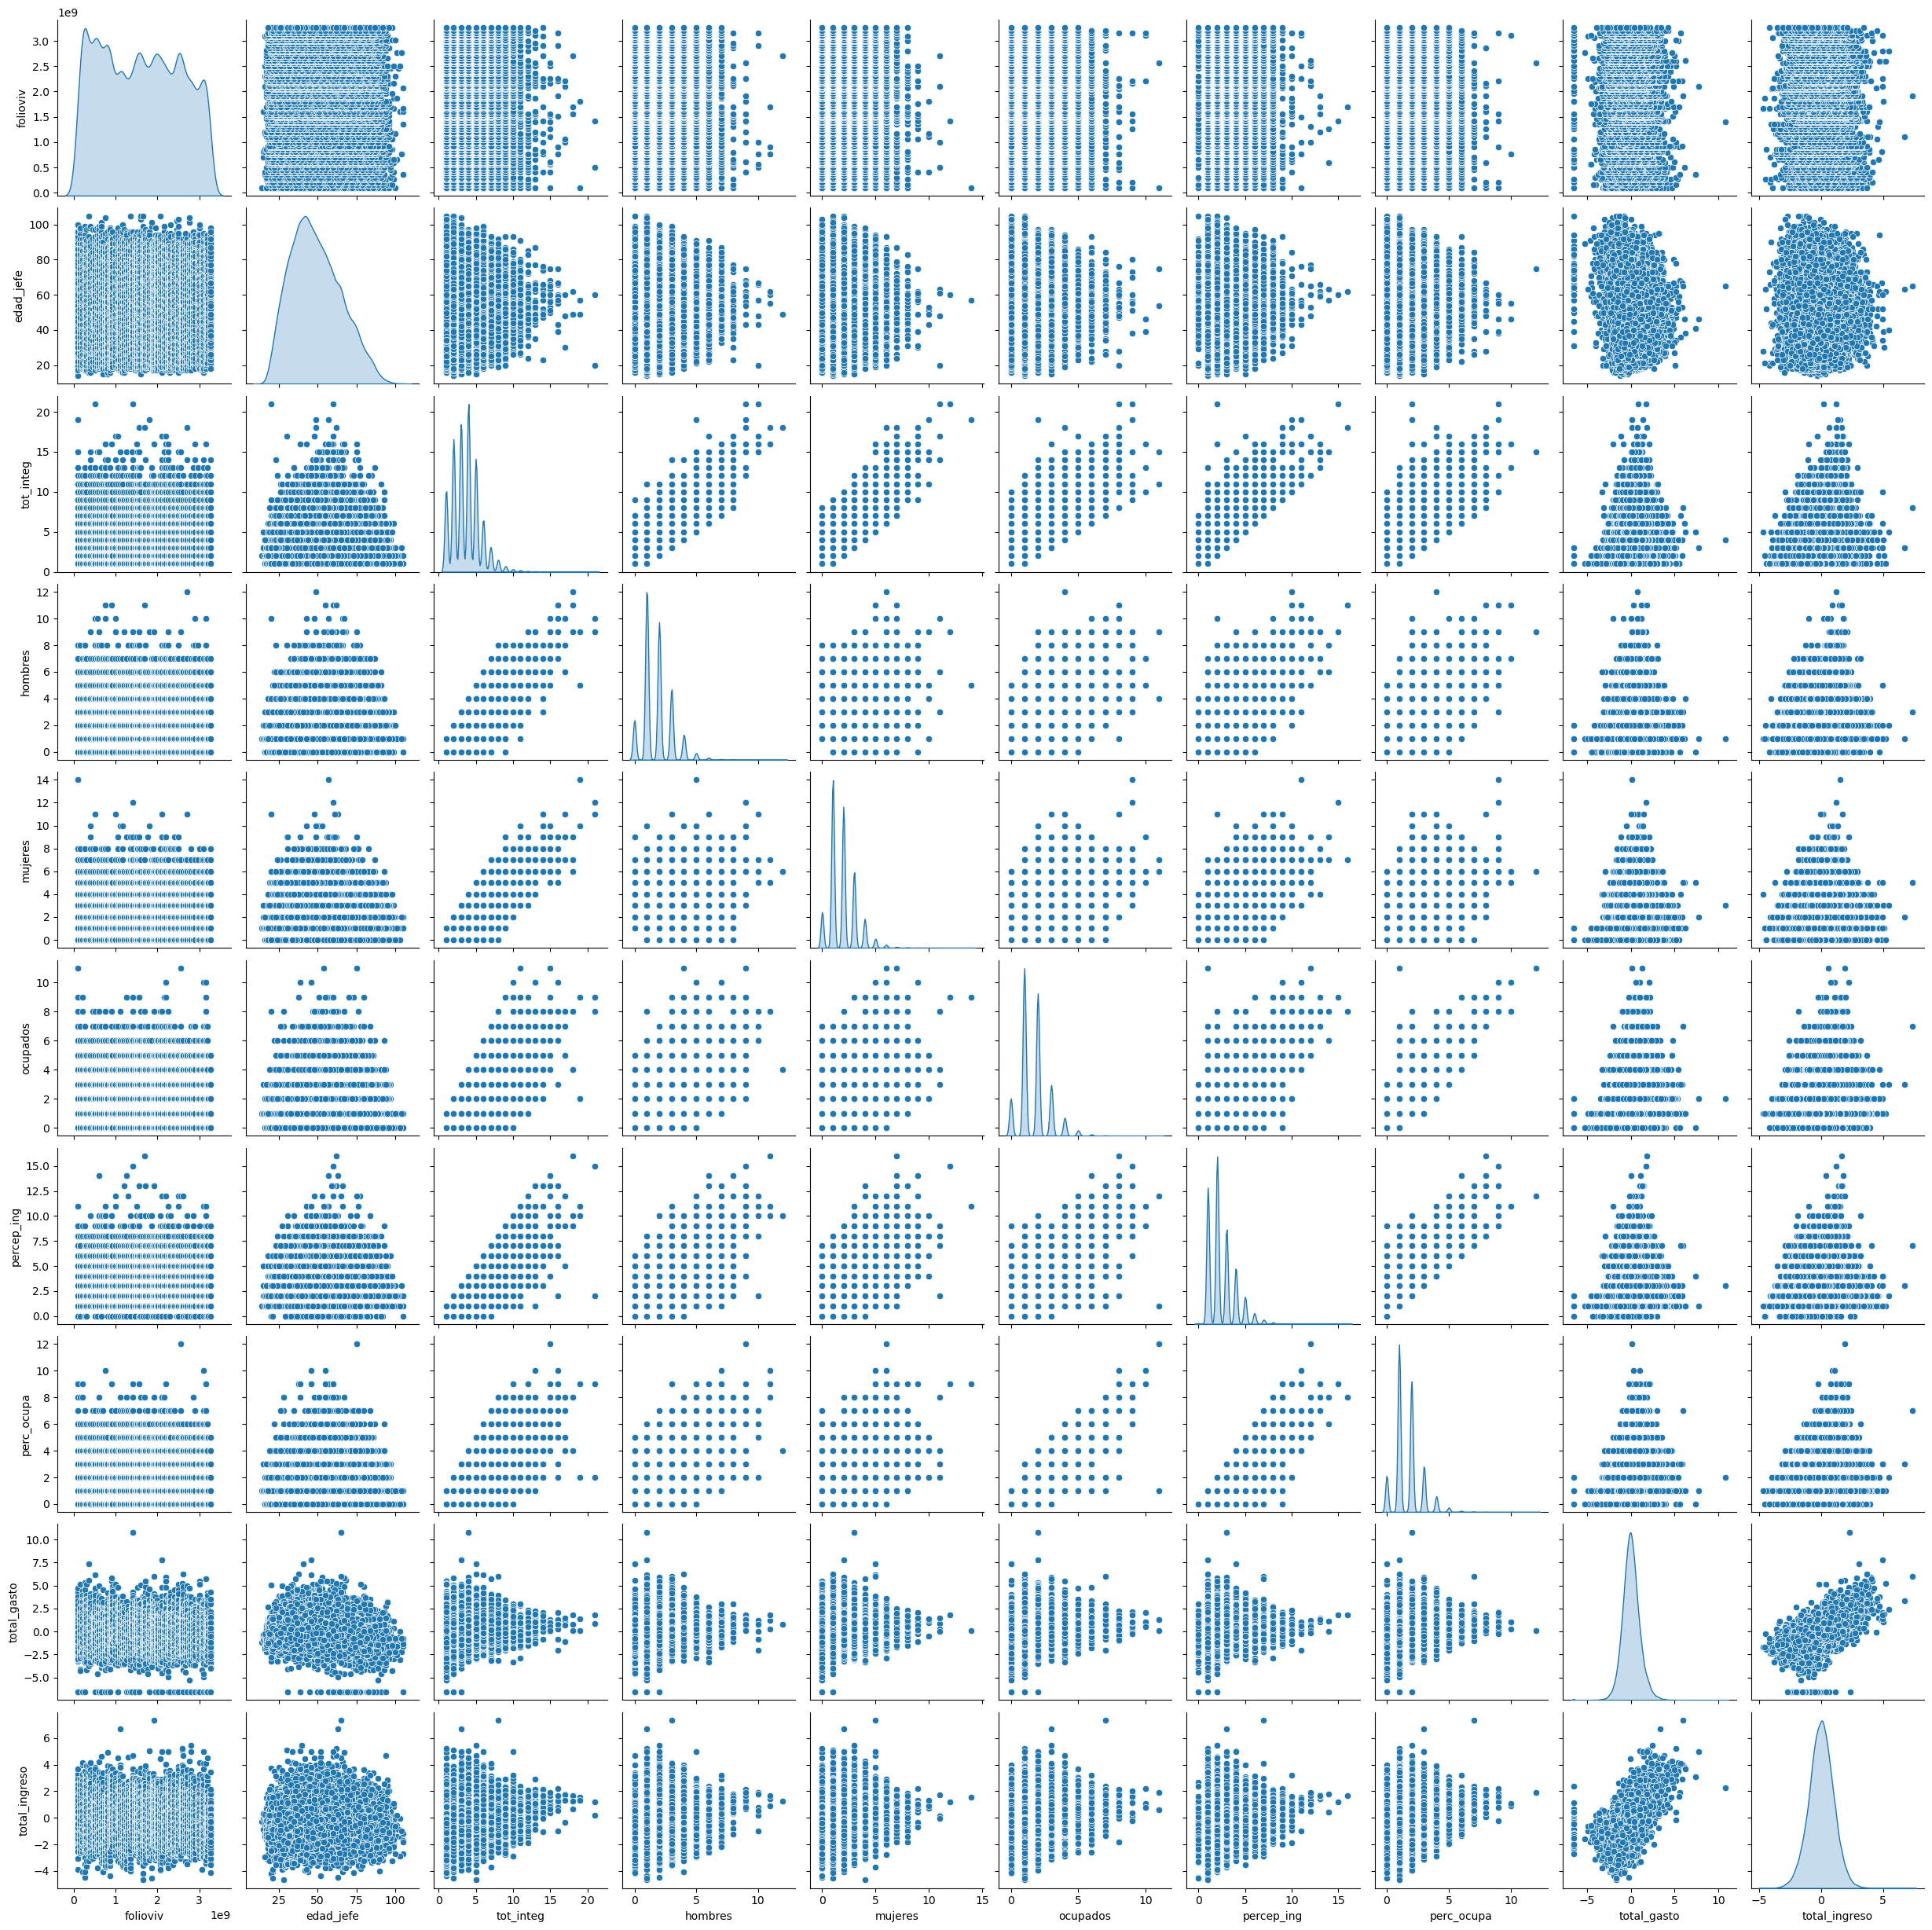

In [20]:
sns.pairplot(data[numeric_columns], diag_kind='kde')
plt.show()

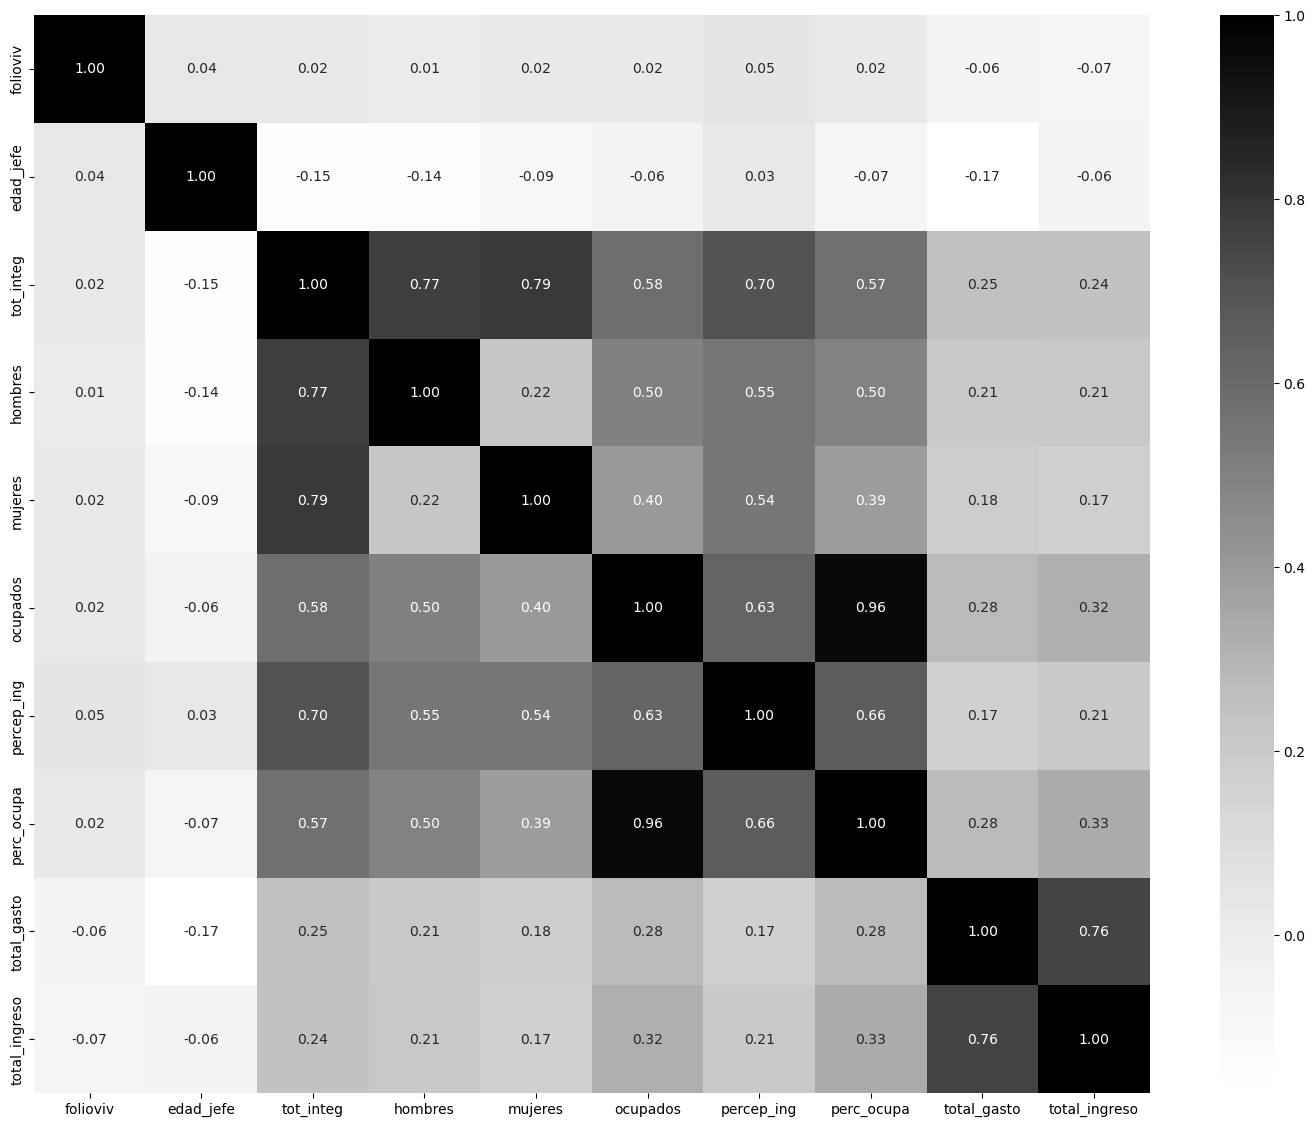

In [21]:
# Select only numeric columns
numeric_df = data[numeric_columns].select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Generate the heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='Greys')
plt.show()

#### **3° PCA (Principal Components Analysis)**

In [24]:
pca = PCA(n_components=2)

pca_df = data[numeric_columns].copy()

pca_df.drop(['folioviv'], axis=1, inplace=True)

pca_features = pca.fit_transform(numeric_df)

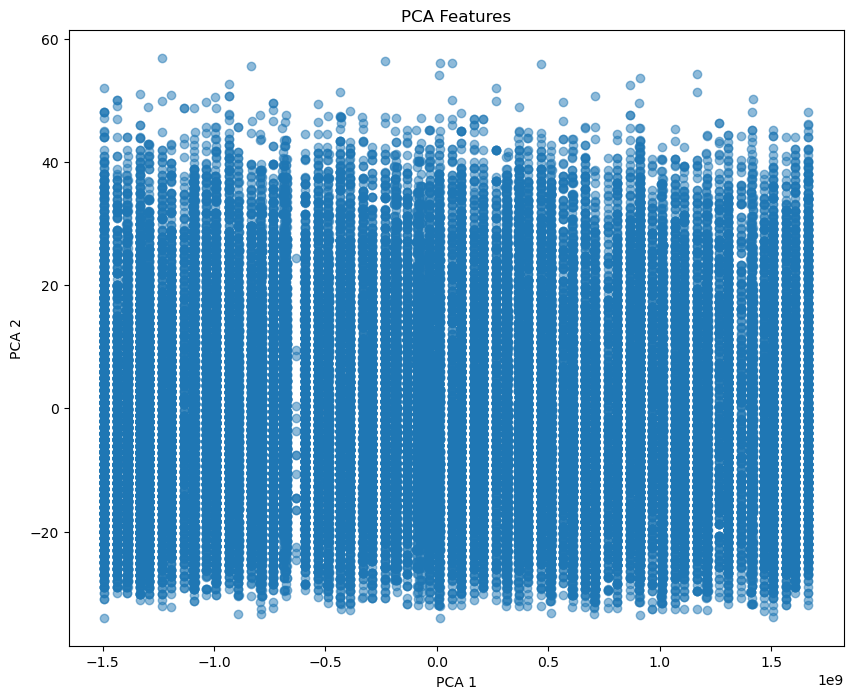

In [25]:
# Plot the PCA features
plt.figure(figsize=(10, 8))
plt.scatter(pca_features[:, 0], pca_features[:, 1], alpha=0.5)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA Features')
plt.show()